In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pandas import DataFrame
from ComCheb import mpRemez,Contours
from mpmath import mp
from time import sleep
mp.pretty = 1

# Tables

In [2]:
with open('Data/WT_Polygon.pkl','rb') as fp:
    D_Pol = pickle.load(fp)
with open('Data/WT_CircularLune.pkl','rb') as fp:
    D_Cir = pickle.load(fp)
with open('Data/WT_Hypocycloid.pkl','rb') as fp:
    D_Hyp = pickle.load(fp)

In [6]:
def data_to_table(D,col_pref=''):
    C  = np.sort(list(set([k[0] for k in D.keys()])))
    df = DataFrame(columns=[col_pref+str(c) for c in C])
    for k in D.keys():
        c,N = k
        c   = col_pref+str(c)
        df.loc[N,c] = f'{float(D[k][-2]):.8f}'
        #df.loc[N,c] = float(D[k][-1])
    return df

def data_to_tex(D,col_pref='',row_pref=''):
    df = data_to_table(D,col_pref)
    print('&'+('&'+col_pref).join([*df.keys()])+r'\\')
    for l in df.index:
        print(row_pref+str(l)+r'&'+'&'.join([*df.loc[l]])+r'\\')
    


In [4]:
data_to_table(D_Pol,"m = ")

,m = 3,m = 4,m = 5,m = 6
5,1.30901051,1.27841716,1.21350890,1.51420435
10,1.14268975,1.12981144,1.14236706,1.17363458
25,1.05488942,1.04969579,1.05544736,1.06322465
50,1.02708221,1.02449420,1.02724022,1.03142381
90,1.01495704,1.01352749,1.01502916,1.01733310
120,1.01119706,1.01012748,1.01124879,1.01297657


In [5]:
data_to_table(D_Hyp,"m = ")

,m = 3,m = 4,m = 5,m = 6
5,1.69594045,1.52124467,1.64453125,2.48832000
10,1.43149779,1.40782752,1.40910966,1.47443526
25,1.25181361,1.24037027,1.24939099,1.26640101
50,1.17181774,1.16257852,1.16744376,1.17588712
90,1.12543411,1.11836230,1.12140197,1.12692589
120,1.10776251,1.10161806,1.10410341,1.10869246


In [6]:
data_to_table(D_Cir,"alpha = ")

,alpha = 0.5,alpha = 1.5
5,1.10286958,1.12569879
10,1.03696888,1.06185388
25,1.03405451,1.02444481
50,1.01442556,1.01215983
90,1.00936347,1.00673877
120,1.00749065,1.00505004


In [7]:
#data_to_tex(D_Pol,row_pref='n = ',col_pref='m = ')
#data_to_tex(D_Hyp,row_pref='n = ',col_pref='m = ')
data_to_tex(D_Cir,row_pref='n = ',col_pref=r'\alpha = ')

&\alpha = 0.5&\alpha = \alpha = 1.5\\
n = 5&1.10286958&1.12569879\\
n = 10&1.03696888&1.06185388\\
n = 25&1.03405451&1.02444481\\
n = 50&1.01442556&1.01215983\\
n = 90&1.00936347&1.00673877\\
n = 120&1.00749065&1.00505004\\


# Widom Asymptotics
## Polygons

In [7]:
with open('Data/WA_Polygon.pkl','rb') as fp:
    D_Pol = pickle.load(fp)

df = data_to_table(D_Pol)
N  = np.array(df.index,dtype=float)
A  = np.array(df,dtype=float)

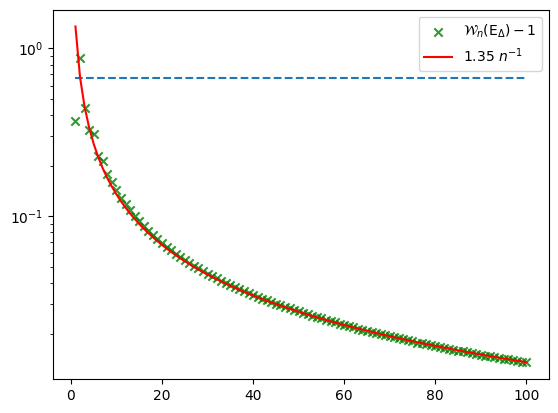

In [9]:
k = 0

fig = plt.figure()
c = 1.35
w = 1
plt.scatter(N,A[:,k]-1,marker='x',c='g',alpha=0.8,label=r'$\mathcal{W}_n(\mathsf{E}_\Delta) -1$')
plt.plot(N,len(N)*[5/3-1],'--')
plt.yscale('log')
plt.plot(N,c*N**-w,c='r',label=r'$'+str(c)+r'\ n^{-'+str(w)+'}'+r'$')
plt.legend()
fig.savefig('Images/ngon-widom-3.png',dpi = 150)


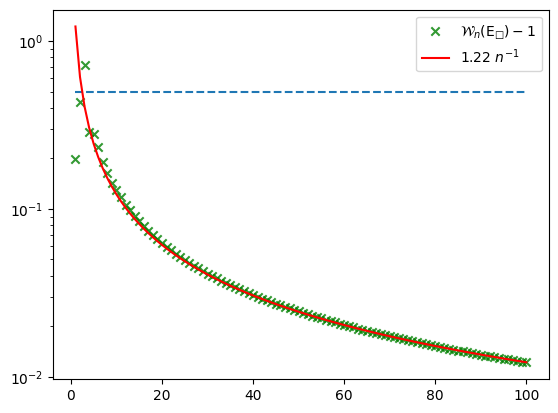

In [10]:
k = 1

fig = plt.figure()
c = 1.22
w = 1
plt.scatter(N,A[:,k]-1,marker='x',c='g',alpha=0.8,label=r'$\mathcal{W}_n(\mathsf{E}_'+'\u25A1) -1$')
plt.plot(N,len(N)*[6/4-1],'--')
plt.yscale('log')
plt.plot(N,c*N**-w,c='r',label=r'$'+str(c)+r'\ n^{-'+str(w)+'}'+r'$')
plt.legend()
fig.savefig('Images/ngon-widom-4.png',dpi = 150)

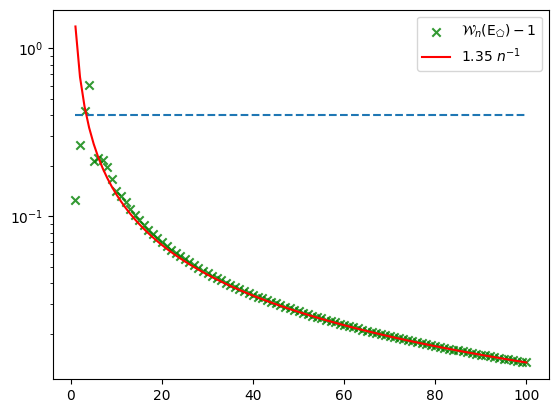

In [11]:
fig = plt.figure()
plt.plot(N,len(N)*[7/5-1],'--')
k = 2
########
c = 1.35
w = 1
plt.scatter(N,A[:,k]-1,marker='x',c='g',alpha=0.8,label=r'$\mathcal{W}_n(\mathsf{E}_'+'\u2B20) -1$')
plt.yscale('log')
plt.plot(N,c*N**-w,c='r',label=r'$'+str(c)+r'\ n^{-'+str(w)+'}'+r'$')
plt.legend()
fig.savefig('Images/ngon-widom-5.png',dpi = 150)

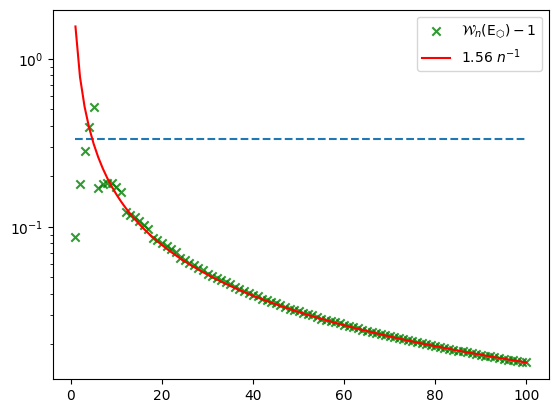

In [12]:
fig = plt.figure()
plt.plot(N,len(N)*[8/6-1],'--')
k = 3
########
c = 1.56
w = 1
plt.scatter(N,A[:,k]-1,marker='x',c='g',alpha=0.8,label=r'$\mathcal{W}_n(\mathsf{E}_'+'\u2B21) -1$')
plt.yscale('log')
plt.plot(N,c*N**-w,c='r',label=r'$'+str(c)+r'\ n^{-'+str(w)+'}'+r'$')
plt.legend()
fig.savefig('Images/ngon-widom-6.png',dpi = 150)

## Hypocycloids

In [13]:
with open('Data/WA_Hypocycloid.pkl','rb') as fp:
    D_Pol = pickle.load(fp)

df = data_to_table(D_Pol)
N  = np.array(df.index,dtype=float)
A  = np.array(df,dtype=float)

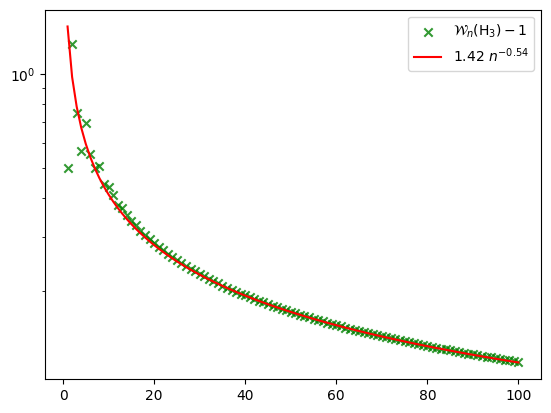

In [14]:
fig = plt.figure()
k = 0
########
c = 1.42
w = 0.54
plt.scatter(N,A[:,k]-1,marker='x',c='g',alpha=0.8,label=r'$\mathcal{W}_n(\mathsf{H}_3) -1$')
plt.yscale('log')
plt.plot(N,c*N**-w,c='r',label=r'$'+str(c)+r'\ n^{-'+str(w)+'}'+r'$')
plt.legend()

fig.savefig('Images/hypocycloid_3.png',dpi = 150)

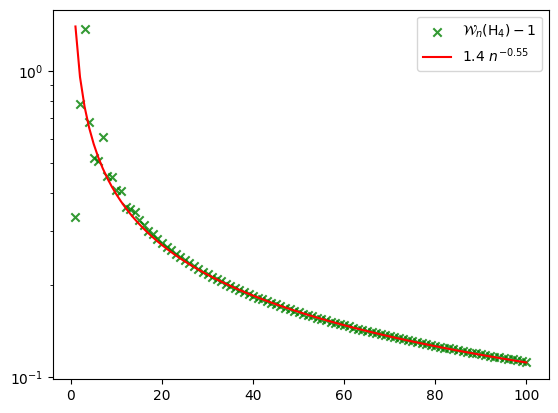

In [15]:
fig = plt.figure()
k = 1
########
c = 1.4
w = 0.55
plt.scatter(N,A[:,k]-1,marker='x',c='g',alpha=0.8,label=r'$\mathcal{W}_n(\mathsf{H}_4) -1$')
plt.yscale('log')
plt.plot(N,c*N**-w,c='r',label=r'$'+str(c)+r'\ n^{-'+str(w)+'}'+r'$')
plt.legend()

fig.savefig('Images/hypocycloid_4.png',dpi = 150)

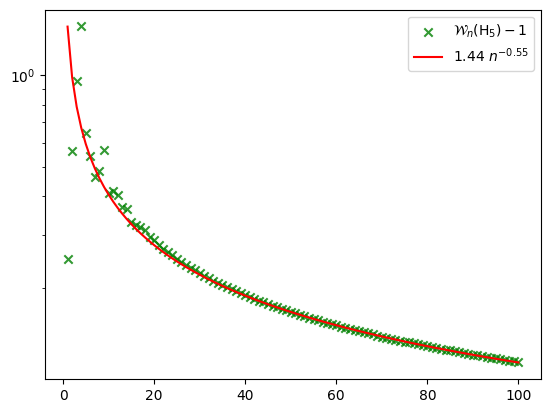

In [16]:
fig = plt.figure()

k = 2
########
c = 1.44
w = 0.55
plt.scatter(N,A[:,k]-1,marker='x',c='g',alpha=0.8,label=r'$\mathcal{W}_n(\mathsf{H}_5) -1$')
plt.yscale('log')
plt.plot(N,c*N**-w,c='r',label=r'$'+str(c)+r'\ n^{-'+str(w)+'}'+r'$')
plt.legend()

fig.savefig('Images/hypocycloid_5.png',dpi = 150)

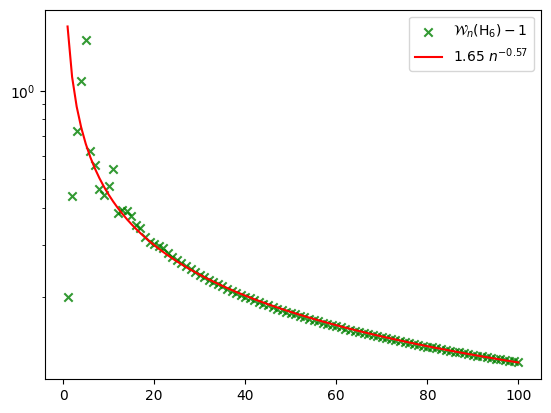

In [17]:
fig = plt.figure()

k = 3
########
c = 1.65
w = 0.57
plt.scatter(N,A[:,k]-1,marker='x',c='g',alpha=0.8,label=r'$\mathcal{W}_n(\mathsf{H}_6) -1$')
plt.yscale('log')
plt.plot(N,c*N**-w,c='r',label=r'$'+str(c)+r'\ n^{-'+str(w)+'}'+r'$')
plt.legend()

fig.savefig('Images/hypocycloid_6.png',dpi = 150)

## Circular Lunes

In [18]:
with open('Data/WA_CircularLune1.pkl','rb') as fp:
    D_C1 = pickle.load(fp)
with open('Data/WA_CircularLune2.pkl','rb') as fp:
    D_C2 = pickle.load(fp)

D_C = D_C1.copy()
D_C.update(D_C2)

df = data_to_table(D_C)
N  = np.array(df.index,dtype=float)
A  = np.array(df,dtype=float)

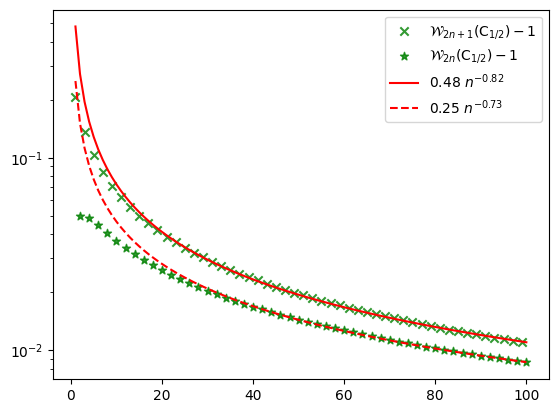

In [19]:
fig = plt.figure()

k = 0
########
c = 0.48
w = 0.82
plt.scatter(N[::2],A[::2,k]-1,marker='x',c='g',alpha=0.8,label=r'$\mathcal{W}_{2n+1}(\mathsf{C}_{1/2}) -1$')
plt.scatter(N[1::2],A[1::2,k]-1,marker='*',c='g',alpha=0.8,label=r'$\mathcal{W}_{2n}(\mathsf{C}_{1/2}) -1$')
plt.yscale('log')
plt.plot(N,c*N**-w,c='r',label=r'$'+str(c)+r'\ n^{-'+str(w)+'}'+r'$')

c = 0.25
w = 0.73
plt.yscale('log')
plt.plot(N,c*N**-w,'--',c='r',label=r'$'+str(c)+r'\ n^{-'+str(w)+'}'+r'$')
plt.legend()

fig.savefig('Images/widom_lune1over2.png',dpi = 150)

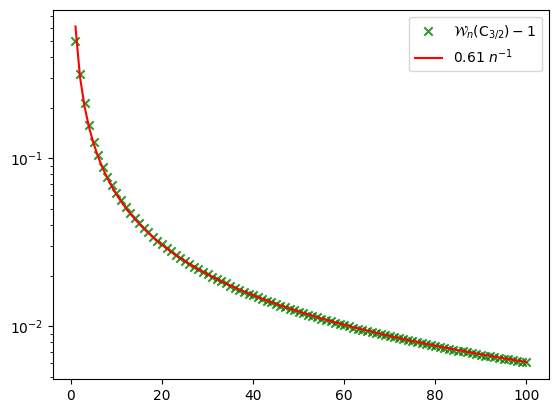

In [20]:
fig = plt.figure()
k = 1
########
c = 0.61
w = 1
plt.scatter(N,A[:,k]-1,marker='x',c='g',alpha=0.8,label=r'$\mathcal{W}_n(\mathsf{C}_{3/2}) -1$')
plt.yscale('log')
plt.plot(N,c*N**-w,c='r',label=r'$'+str(c)+r'\ n^{-'+str(w)+'}'+r'$')
plt.legend()


fig.savefig('Images/widom_lune3over2.png',dpi = 150)

# Comparison to Faber Coefficients

In [21]:
with open('Data/FC_CircLune.pkl','rb') as fp:
    D_C = pickle.load(fp)
with open('Data/FC_Hypocycloid.pkl','rb') as fp:
    D_H = pickle.load(fp)
with open('Data/FC_Lemniscate.pkl','rb') as fp:
    D_L = pickle.load(fp)

In [22]:
def cplot(D,label=None):
    R = list(D.keys())
    plt.plot(R,[D[r][-1] for r in R],label=label)
    plt.yscale('log')

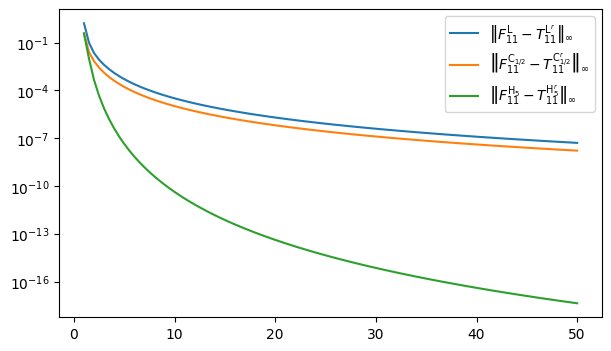

In [23]:
fig = plt.figure(figsize=(7,4))


cplot(D_L,r'$\left\|F_{11}^{\mathsf {L}}-T_{11}^{\mathsf {L}^r} \right\|_\infty$')
cplot(D_C,r'$\left\|F_{11}^{\mathsf {C}_{1/2}}-T_{11}^{\mathsf {C}^r_{1/2}} \right\|_\infty$')
cplot(D_H,r'$\left\|F_{11}^{\mathsf {H}_5}-T_{11}^{\mathsf {H}_5^r} \right\|_\infty$')


plt.legend()


fig.savefig('Images/faber-cheb-comp.png',dpi = 300)

In [24]:
def asymp_spped(D):
    r1,r2 = list(D.keys())[-2:]
    return float(np.log(float(D[r2][-1]/D[r1][-1]))/np.log(r1/r2))

print(asymp_spped(D_C))
print(asymp_spped(D_L))
print(asymp_spped(D_H))


4.00009368597756
4.100311544789366
9.999994817582122


Note, the errors for Circular Lune and the Lemniscate behave like $\mathcal O(r^{-4})$ and the error for the Circular lunes like $\mathcal O(r^{-10})$.

# Roots

In [25]:
with open('Data/roots.pkl','rb') as fp:
    D = pickle.load(fp)

In [26]:
def poly_cap(m,sl=1):   # mpmath implementation of capacity of polygons
    m = mp.mpf(m)
    return mp.gamma(1/m)/(2**(1+2/m)*mp.pi**0.5*mp.gamma(1/2+1/m))
curves = {'P':lambda m: Contours.mpPolygon(m,sl=1/poly_cap(m)),
          'C':Contours.mpCircLune,
          'H':Contours.mpHypocycloid,
          'L':lambda r : Contours.mpLemniscate(r=r),
          'E3':lambda var: Contours.mpE3(var),
          'E4':lambda r,maxsteps=10000 : Contours.mpE4(r,maxsteps)}


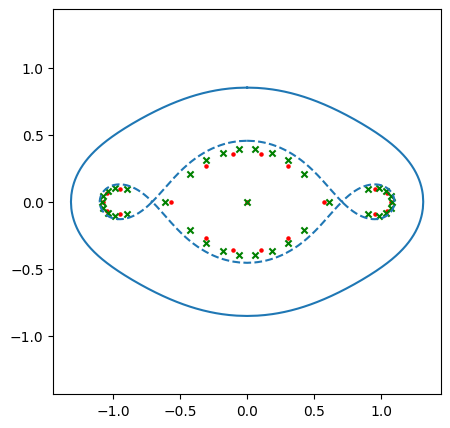

In [27]:
# Set the wanted plot with k = 0,...,13
k = 13


names = ['ngon-zeros-3-deg-16-62.png'       ,'ngon-zeros-4-deg-17-82.png'   ,
         'ngon-zeros-5-deg-21-102.png'      ,'ngon-zeros-6-deg-27-122.png'  ,
         'lune-zeros-1-2-degs-11-21.png'    ,'lune-zeros-3-2-degs-10-50.png',
         'hyp-zeros-3-deg-31-47.png'        ,'hyp-zeros-4-deg-41-62.png'    ,
         'hyp-zeros-5-deg-51-77.png'        ,'hyp-zeros-6-deg-61-92.png'    ,
         'bernoulli_zeros.png'              ,'peanut_zeros.png'             ,
         'gen-lem-2-zeros-r=2-deg-25-40.png','gen-lem-1-zeros-r=1-deg-21-37.png']

fig = plt.figure(figsize=(5,5))
t  = np.linspace(0,1,1001)
keys = list(D.keys())

k = 2*k
g,m,n = keys[k]
gamma = curves[g](m)
tmp   = gamma(t).astype(complex)
marker = '.'
color  = 'r'
plt.plot(tmp.real,tmp.imag)
r = D[keys[k]][-1].astype(complex)
plt.scatter(r.real,r.imag,s=20,marker=marker,c=color)

k +=1
g,m,n = keys[k]
gamma = curves[g](m)
tmp   = gamma(t).astype(complex)
marker = 'x'
color  = 'g'
r = D[keys[k]][-1].astype(complex)

k =k//2
if k == 11:
    g,m,n = keys[2*k-2]
    gamma = curves[g](m)
    tmp   = gamma(t).astype(complex)
    plt.plot(tmp.real,tmp.imag,'--',c='C0')

elif k==12:
    t = np.linspace(0,1,10001)
    gamma = Contours.mpE3(2)
    tmp   = gamma(t).astype(complex)
    plt.plot(tmp.real,tmp.imag,'--',c='C0')
elif k==13:
    t = np.linspace(0,1,1001)
    gamma = Contours.mpE4(1)
    tmp   = gamma(t).astype(complex)
    plt.plot(tmp.real,tmp.imag,'--',c='C0')



plt.scatter(r.real,r.imag,s=20,marker=marker,c=color)

plt.axis('equal')
fig.savefig('Images/'+names[k],dpi=200)

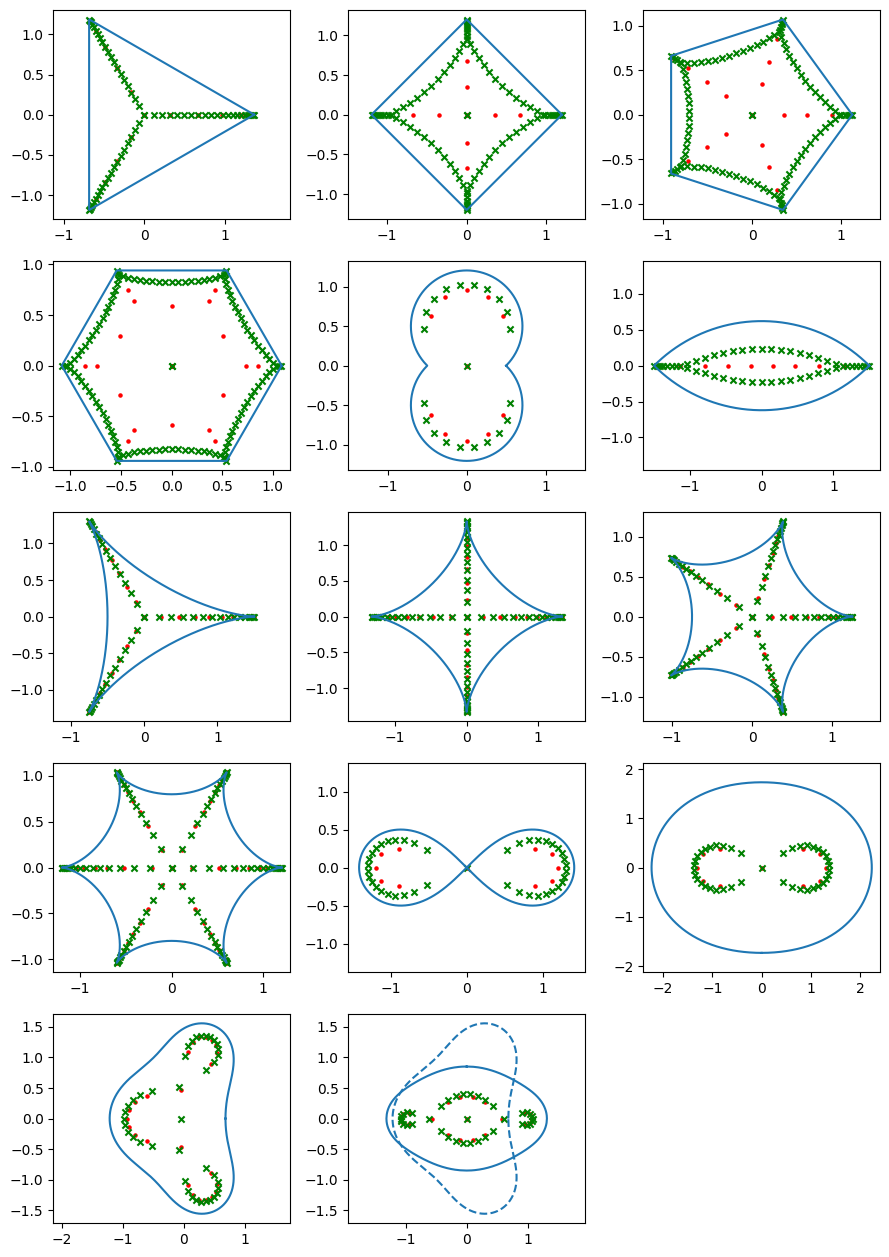

In [28]:
# Set the wanted plot with k
k = 0


fig = plt.figure(figsize=(9,30))
t  = np.linspace(0,1,1001)
keys = list(D.keys())
for k in range(0,len(D)):
    g,m,n = keys[k]
    gamma = curves[g](m)
    tmp   = gamma(t).astype(complex)
    plt.subplot(12,3,k//2+1)
    if k%2==0:
        marker = '.'
        color  = 'r'
        plt.plot(tmp.real,tmp.imag)
    else:
        marker = 'x'
        color  = 'g'
    r = D[keys[k]][-1].astype(complex)

    if k ==len(D)-1:
        g,m,n = keys[k-2]
        gamma = curves[g](m)
        tmp   = gamma(t).astype(complex)
        plt.plot(tmp.real,tmp.imag,'--',c='C0')
    
    plt.scatter(r.real,r.imag,s=20,marker=marker,c=color)

    plt.axis('equal')
plt.tight_layout()